# CIFAR 10 - Categorical Classification

In [1]:
import warnings
warnings.filterwarnings('ignore')

# I. CIFAR 10 Data_Set Load & Review

> ## 1) Load CIFAR 10 Data_Set

In [2]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


* Train_Data Information

In [3]:
print(len(X_train))
print(X_train.shape)

print(len(y_train))
print(y_train[0:5])

50000
(50000, 32, 32, 3)
50000
[[6]
 [9]
 [9]
 [4]
 [1]]


* Test_Data Information

In [4]:
print(len(X_test))
print(X_test.shape)

print(len(y_test))
print(y_test[0:5])

10000
(10000, 32, 32, 3)
10000
[[3]
 [8]
 [8]
 [0]
 [6]]


> ## 2) Visualization

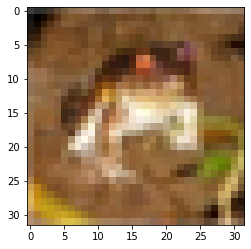

In [5]:
import matplotlib.pyplot as plt

digit = X_train[0]
plt.imshow(digit)
plt.show()

In [6]:
import numpy as np
np.set_printoptions(linewidth = 150)

print(X_train[0][0])

[[ 59  62  63]
 [ 43  46  45]
 [ 50  48  43]
 [ 68  54  42]
 [ 98  73  52]
 [119  91  63]
 [139 107  75]
 [145 110  80]
 [149 117  89]
 [149 120  93]
 [131 103  77]
 [125  99  76]
 [142 115  91]
 [144 112  86]
 [137 105  79]
 [129  97  71]
 [137 106  79]
 [134 106  76]
 [124  97  64]
 [139 113  78]
 [139 112  75]
 [133 105  69]
 [136 105  74]
 [139 108  77]
 [152 120  89]
 [163 131 100]
 [168 136 108]
 [159 129 102]
 [158 130 104]
 [158 132 108]
 [152 125 102]
 [148 124 103]]


# II. Data Preprocessing

> ## 1) Reshape and Normalization

* reshape
 * (50000, 32, 32, 3) to (50000, 3072)

In [8]:
X_train = X_train.reshape((50000, 32 * 32 * 3))
X_test = X_test.reshape((10000, 32 * 32 * 3))

X_train.shape, X_test.shape

((50000, 3072), (10000, 3072))

* Normalization

In [11]:
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

In [13]:
print(X_train[5])

[0.62352941 0.4        0.39607843 ... 0.71372549 0.22352941 0.0745098 ]


> ## 2) One Hot Encoding

In [14]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [15]:
print(y_train[:5])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


# III. Keras Modeling

> ## 1) Model Define

* 모델 신경망 구조 정의


In [17]:
from tensorflow.keras import models, layers

mnist = models.Sequential()
mnist.add(layers.Dense(512, activation='relu', input_shape=(32 * 32 * 3,)))
mnist.add(layers.Dense(256, activation='relu'))
mnist.add(layers.Dense(10, activation='softmax'))

* 모델 구조 확인

In [18]:
mnist.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 1,707,274
Trainable params: 1,707,274
Non-trainable params: 0
_________________________________________________________________


> ## 2) Model Compile

* 모델 학습방법 설정

In [19]:
mnist.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

> ## 3) Model Fit

* 약 5분

In [20]:
%%time 

Hist_mnist = mnist.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_split = 0.2)

Epoch 1/100
313/313 [==============================] - 6s 8ms/step - loss: 2.2319 - accuracy: 0.2471 - val_loss: 1.9568 - val_accuracy: 0.2791
Epoch 2/100
313/313 [==============================] - 2s 8ms/step - loss: 1.8135 - accuracy: 0.3504 - val_loss: 1.8330 - val_accuracy: 0.3461
Epoch 3/100
313/313 [==============================] - 2s 7ms/step - loss: 1.7244 - accuracy: 0.3821 - val_loss: 1.7573 - val_accuracy: 0.3702
Epoch 4/100
313/313 [==============================] - 2s 7ms/step - loss: 1.6566 - accuracy: 0.4058 - val_loss: 1.8652 - val_accuracy: 0.3394
Epoch 5/100
313/313 [==============================] - 2s 7ms/step - loss: 1.6043 - accuracy: 0.4300 - val_loss: 1.6088 - val_accuracy: 0.4283
Epoch 6/100
313/313 [==============================] - 2s 8ms/step - loss: 1.5681 - accuracy: 0.4421 - val_loss: 1.6670 - val_accuracy: 0.4166
Epoch 7/100
313/313 [==============================] - 2s 8ms/step - loss: 1.5303 - accuracy: 0.4567 - val_loss: 1.5977 - val_accuracy: 0.4361

> ## 4) 학습 결과 시각화

* Loss Visualization

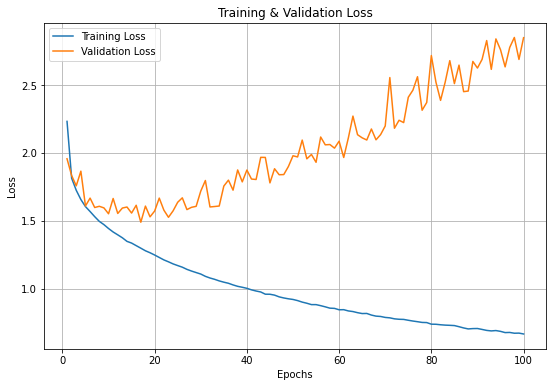

In [21]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_mnist.history['loss']) + 1)

plt.figure(figsize=(9,6))
plt.plot(epochs, Hist_mnist.history['loss'])
plt.plot(epochs, Hist_mnist.history['val_loss'])
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

> ## 5) Model Evaluate

* Loss & Accuracy

In [22]:
loss, accuracy = mnist.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 1s 3ms/step - loss: 2.7497 - accuracy: 0.4518
Loss = 2.74969
Accuracy = 0.45180


> ## 6) Model Predict

* Probability

In [23]:
np.set_printoptions(suppress=True, precision=9)

print(mnist.predict(X_test[:1,:]))

[[0.000543273 0.000000017 0.000011056 0.76082367  0.05697803  0.18095772  0.000004318 0.          0.000681877 0.000000035]]


* Class

In [24]:
print(np.argmax(mnist.predict(X_test[:1,:])))

3


# 
# 
# 
# The End
# 
# 
# 